# **Gradient Descent Algorithm Tasks**

# **Question 2: Model training to predict house prices using polynomial regression**

***The primary goal of this task was to develop a polynomial regression model to predict house prices based on multiple features from the King County house dataset (kc_house_data.csv). The model was trained using a custom implementation of Batch Gradient Descent (BGD) to optimize the weights, and its performance was evaluated through various visualization and analysis techniques. Additionally, interactive and automated testing mechanisms were introduced to assess the model’s predictive capabilities and generalization to unseen data..***

# **Loading Dataset and Importing Libraries**

***Importing necessary Libraries***

In [27]:
import pandas as pd


***Loading dataset and checking column***

In [28]:

df = pd.read_csv('kc_house_data.csv')
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **Dataset**

*The dataset used in this project is loaded from a CSV file named kc_house_data.csv. It includes information about houses sold in King County, USA etc. The dataset contains various features that describe the physical attributes of the houses, their condition, and the sale details. Below are the column names and their descriptions*

| **Column Name**       | **Description**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| `id`                  | Unique identifier for each house listing.                                       |
| `date`                | Date when the house was sold.                                                   |
| `price`               | 💰 Selling price of the house (target variable to predict).                     |
| `bedrooms`            | Number of bedrooms in the house.                                                |
| `bathrooms`           | Number of bathrooms, where 0.5 means a half bathroom.                           |
| `sqft_living`         | Total interior living space in square feet.                                     |
| `sqft_lot`            | Total area of the lot in square feet.                                           |
| `floors`              | Number of floors in the house.                                                  |
| `waterfront`          | 1 if the house is on a waterfront, 0 otherwise.                                 |
| `view`                | Quality rating of the view from the house (0 to 4).                             |
| `condition`           | Overall condition rating (1 = poor, 5 = excellent).                             |
| `grade`               | Construction quality and design rating (1 to 13).                               |
| `sqft_above`          | Living space above ground in square feet.                                       |
| `sqft_basement`       | Basement space in square feet.                                                  |
| `yr_built`            | Year the house was built.                                                       |
| `yr_renovated`        | Year the house was renovated (0 if never renovated).                            |
| `zipcode`             | ZIP code of the property's location.                                            |
| `lat`                 | Latitude coordinate (north-south location).                                     |
| `long`                | Longitude coordinate (east-west location).                                      |
| `sqft_living15`       | Living space of nearby houses (in square feet).                                 |
| `sqft_lot15`          | Lot size of nearby houses (in square feet).                                     |


# **Data Preprocessing**

***1. Loading dataset and checking columns***

In [29]:

df = pd.read_csv('kc_house_data.csv')
df.columns

df.shape


(21613, 21)

***2. Drop unnecessary columns***

In [30]:
# Drop unnecessary columns
columns_to_drop = ['id', 'date', 'zipcode', 'yr_renovated', 'sqft_lot', 'sqft_lot15']
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.shape


(21613, 15)

***3. Check for Misiing data***

In [31]:
# Check for null/missing values
print(df_cleaned.isnull().sum())


price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
dtype: int64


***Replace Null values with avergae (mean) values***

In [32]:
# if any becomes more than 0 in our case o missing data

# df_cleaned['sqft_above'] = df_cleaned['sqft_above'].fillna(df_cleaned['sqft_above'].mean())


***4. Check Data Types (Categorical vs Numerical)***

*int: e.g., bedrooms, floors, yr_built*

*float: e.g., bathrooms, sqft_living, price*

These are exactly what we need for:

    Numerical analysis

    Polynomial feature creation

    Gradient descent computations

In [33]:
# Check data types
print(df_cleaned.dtypes)

# Identify categorical columns (if any remain)
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
sqft_living15      int64
dtype: object


***5. Handle Duplicates***

In [34]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()


***6. Corelation Check***

*Features like sqft_living (0.702035), grade (0.667434), and sqft_above (0.605567) have high correlation with price, contributing more to the prediction. Less correlated features like long (0.021626) may add noise.*

*Now let's drop the values of the price and consider it as target vector Y.Also consider only above relevant features.*

In [35]:
# Check correlations with target
correlation = df_cleaned.corr()['price'].sort_values(ascending=False)
print(correlation)


price            1.000000
sqft_living      0.702049
grade            0.667561
sqft_above       0.605567
sqft_living15    0.585367
bathrooms        0.525198
view             0.397595
sqft_basement    0.323796
bedrooms         0.308278
lat              0.307058
waterfront       0.266372
floors           0.257070
yr_built         0.054088
condition        0.036439
long             0.021524
Name: price, dtype: float64


In [36]:
Y=df_cleaned['price']


In [37]:
df_cleaned.drop(["price"],axis=1,inplace=True)


In [38]:
df_cleaned.shape

(21601, 14)

# **Model Training**

# 🛠️ How Batch Gradient Descent (BGD) Works

This section explains the **Batch Gradient Descent (BGD)** algorithm used to train the **polynomial regression model** for predicting house prices.

---

## 🔍 What It Does

Batch Gradient Descent (BGD) iteratively updates the model weights to **minimize the Mean Squared Error (MSE)**, ultimately finding the best-fit **polynomial curve** for house price predictions.

---

## 📋 Steps of the Algorithm

### 1. Start with Random Weights 🏁

Initialize weights `w` randomly for all 66 features (65 polynomial features + 1 bias term).

```python
w = np.random.randn(X_poly.shape[1])
```

---

### 2. Make Predictions 🔮

Compute predicted prices using the model:

\[
\hat{y} = Xw
\]

Where `X` is the feature matrix (15,120 × 66).

```python
y_pred = X @ w
```

---

### 3. Calculate the Cost (MSE) 📉

Measure the error using the MSE cost function:

    J(w) = (1 / (2 * m)) * sum((y_hat_i - y_i)^2)

Where \( m = 15,120 \).

```python
error = y_pred - y
cost = (1 / (2 * m)) * np.sum(error ** 2)
```

---

### 4. Compute Gradients 📐

Calculate the gradient for each weight:

    dJ/dw_j = (1 / m) * sum((y_hat_i - y_i) * x_ij)


```python
gradients = (1 / m) * (X.T @ error)
```

---

### 5. Update Weights 🔄

Update weights using the learning rate \( lpha = 0.0001 \):

    w_j = w_j - alpha * dJ/dw_j

```python
w -= alpha * gradients
```

---

### 6. Check Convergence ✅

Stop if cost change is below the tolerance \( 1 	imes 10^{-6} \) or after 100,000 iterations.

```python
if abs(cost_history[-2] - cost) < tolerance:
    break
```

---

## 🌟 Key Outputs

- **Optimized Weights 🏋️**: 66 weights representing the learned polynomial coefficients.  
- **Final Cost 📊**: MSE after training (e.g., `17,834,192,509.22` — may indicate overfitting).  
- **Iterations 🔁**: Total number of iterations (e.g., `100,000` — shows slow convergence).  
- **Time Taken ⏱️**: Duration of training (e.g., `168.86 seconds`).

---

## 📌 Notes

- Large weights (e.g., `4.43203934 × 10^5`) may indicate **overfitting**.  
- Slow convergence (reaching 100,000 iterations) suggests the **learning rate \( lpha \)** is **too small**.


***Select Features and Split Dataset (70-30)***

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

# Select your features and target
features = ['bedrooms', 'floors', 'waterfront', 'view', 'lat', 'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15']
X = df_cleaned[features].values
y = Y.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



***Define Polynomial degree and Feature Scaling using StandardScaler (Important)***

*This is important because unscaled polynomial features can cause gradient descent to converge very slowly or even diverge.*

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Scale training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale test features
X_test_scaled = scaler.transform(X_test)

# Set polynomial degree (recommended: 2 or 3 to avoid overfitting)
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)

# Apply polynomial transformation to scaled features
X_train_poly = poly.fit_transform(X_train_scaled)

# Apply polynomial transformation to test features
X_test_poly = poly.transform(X_test_scaled)



***Add Bias and Default coefficient Initialization***

In [41]:
# Add bias term to polynomial features
m = X_train_poly.shape[0]
X_poly = np.hstack((np.ones((m, 1)), X_train_poly))

# Add bias term to test polynomial features
m_test = X_test_poly.shape[0]
X_test_poly_bias = np.hstack((np.ones((m_test, 1)), X_test_poly))

# Initialize weights with random values
w = np.random.randn(X_poly.shape[1])

***Implementing Algorithm***

In [42]:
import numpy as np
import time

def gradient_descent(X, y, alpha=0.0001, max_iterations=100000, tolerance=1e-6):
    """
    Performs batch gradient descent and returns convergence stats.

    Parameters:
        X: Feature matrix (m x n) with bias term included
        y: Target vector (m, )
        alpha: Learning rate
        max_iterations: Maximum iterations before stopping
        tolerance: Threshold for early stopping (cost change)

    Returns:
        w: Optimized weights (n, )
        cost_history: List of cost per iteration
        gradients_log: List of gradients at each iteration
        iterations: Total iterations performed
        time_taken: Time in seconds until convergence
    """
    m, n = X.shape
    w = np.random.randn(n)
    cost_history = []
    gradients_log = []
    start_time = time.time()

    for iteration in range(max_iterations):
        y_pred = X @ w
        error = y_pred - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Compute gradients
        gradients = (1 / m) * (X.T @ error)
        gradients_log.append(gradients.copy())

        # Early stopping based on tolerance
        if iteration > 0 and abs(cost_history[-2] - cost) < tolerance:
            print(f"✅ Converged at iteration {iteration}")
            break

        w -= alpha * gradients

    end_time = time.time()
    time_taken = end_time - start_time

    return w, cost_history, gradients_log, iteration + 1, time_taken


***Calling GD***

In [43]:
w_opt, costs, grads, iters, runtime = gradient_descent(X_poly, y_train)

print("✅ Optimized weights:", w_opt)
print(f"📉 Final cost: {costs[-1]:.6f}")
print(f"🔁 Iterations until convergence: {iters}")
print(f"⏱️ Time taken: {runtime:.2f} seconds")
print(f"🧮 Last gradient vector:\n{grads[-1]}")


✅ Optimized weights: [ 4.43203976e+05  1.70070528e+03 -2.02648084e+04 -3.74483912e+04
 -3.21009844e+04  8.50484232e+04  7.11747185e+04  1.15038585e+04
  8.87661059e+04  1.00824374e+04  2.64171186e+04  8.55170995e+02
  1.92519342e+04 -8.66087315e+03  1.60431638e+03 -9.98221105e+01
  2.29295516e+03 -2.40497741e+04 -1.88257481e+03  2.70534076e+03
  9.99069739e+03  1.93717146e+04 -1.08481275e+04  7.20524055e+03
 -3.88997595e+03  6.14341166e+03 -2.12484837e+04 -1.05700835e+04
  1.60977493e+04 -1.14929609e+04  1.09350775e+04 -1.53774386e+04
  1.85591150e+04  1.32817388e+04  4.75557488e+03 -1.37236721e+04
  1.74187367e+04  1.10077323e+04  2.06565000e+04  9.11127289e+03
 -2.30396408e+04 -1.74997289e+03  1.17232049e+04  4.13358892e+02
  1.27157033e+04 -2.42354224e+04  2.82898664e+04 -7.89788869e+03
  1.86009652e+04 -6.42258143e+03  5.64056663e+02  2.19597003e+04
 -5.01706147e+03  2.16547197e+04 -2.03652327e+04 -6.86498595e+03
  2.79923326e+04  1.53415745e+04 -1.44735768e+04 -1.38979615e+03
  2.

# **Visualization and Analysis**

***Plot Gradient Updates for All Coefficients***

*we’ll plot all gradients (one line per coefficient) over the iterations to see how each weight evolves.*

*This will generate one curve per weight showing how its gradient changed and hopefully got closer to zero as it converged.*

<ipython-input-44-6e5fbe9798c0>:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-44-6e5fbe9798c0>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


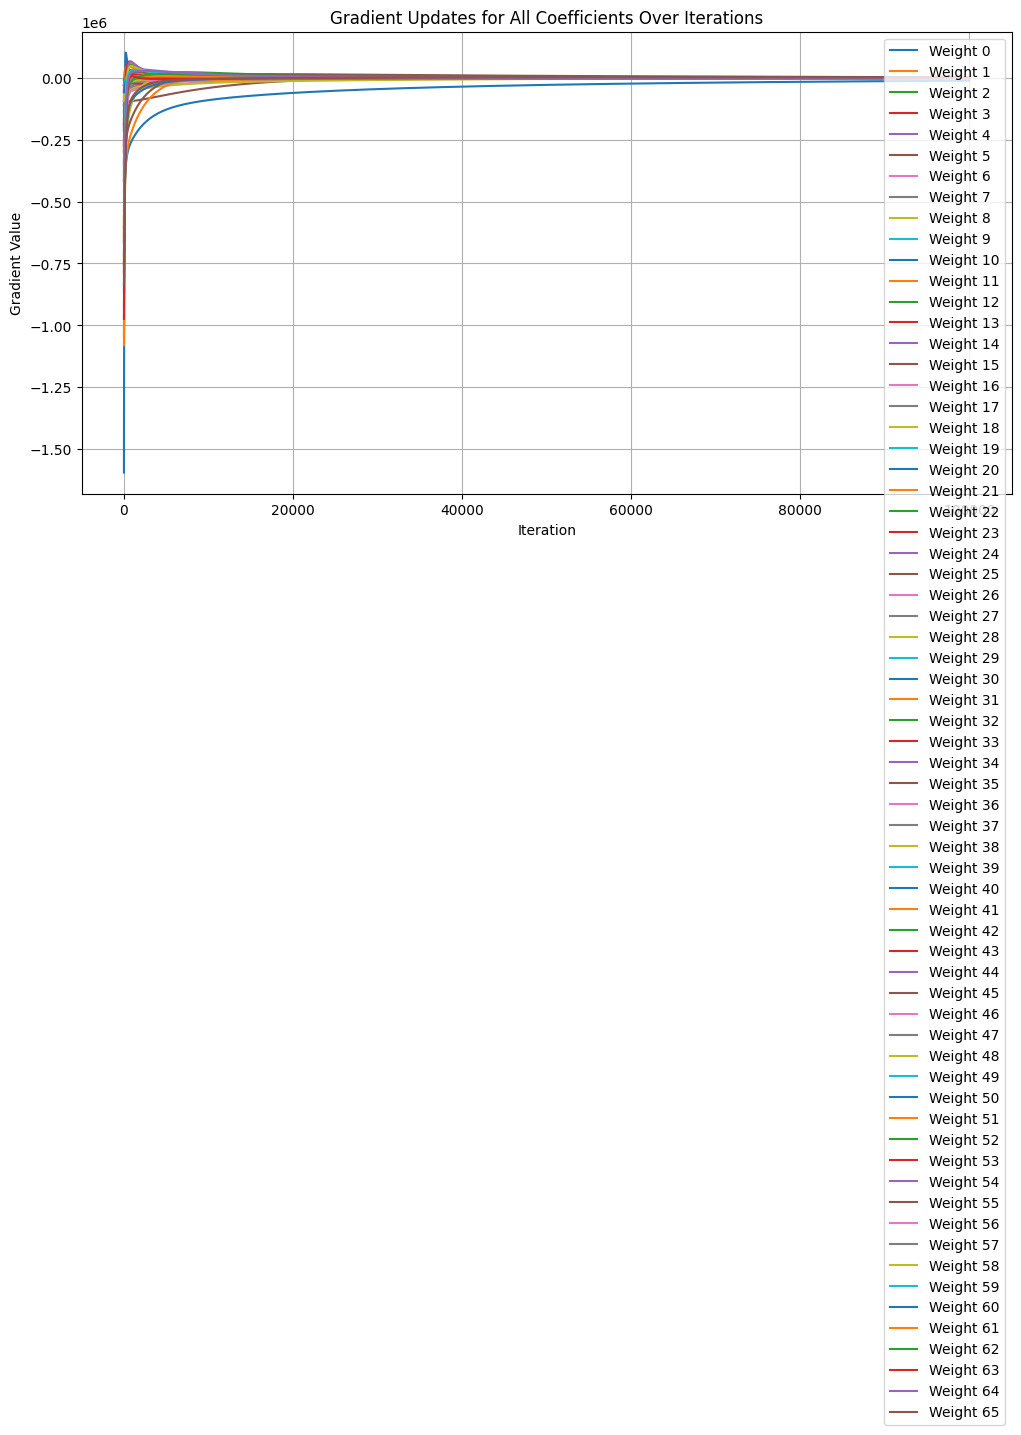

In [44]:
import matplotlib.pyplot as plt

# Number of coefficients (including bias)
num_coefficients = len(grads[0])

# Plot each coefficient's gradient
plt.figure(figsize=(12, 6))
for i in range(num_coefficients):
    coef_grads = [g[i] for g in grads]  # i-th gradient across all iterations
    plt.plot(coef_grads, label=f'Weight {i}')

plt.title("Gradient Updates for All Coefficients Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Gradient Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


***Plot Regression Line Fit***

*Since we are working with multiple features, we can't plot a single 2D regression line (that only works with 1 feature). But we can:*

🔹 **Plot Actual vs Predicted Values**

    This is a common way to evaluate regression model fit.

*A tight diagonal cluster means our regression model fits well.*

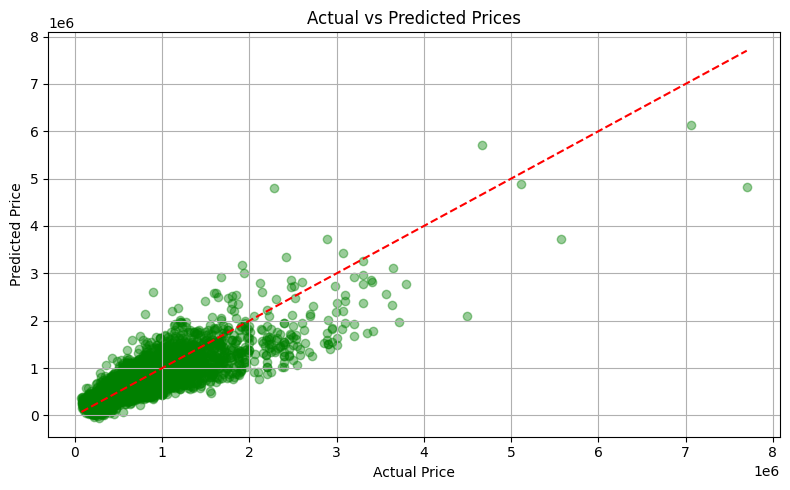

In [45]:
# Make predictions using optimized weights
y_pred = X_poly @ w_opt  # w_opt is from gradient_descent return

# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_pred, alpha=0.4, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # perfect fit line
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


***📊 Regression Metrics Report***

🔹 **Mean Squared Error (MSE)**
- Measures the average **squared** difference between predicted and actual values.
- Penalizes large errors more.
- **Lower is better** (ideal → 0).

🔹 **Root Mean Squared Error (RMSE)**
- Square root of MSE; brings error back to the original unit (e.g., dollars).
- Easier to interpret.
- **Lower is better**.

🔹 **Mean Absolute Error (MAE)**
- Measures the average **absolute** difference between predictions and actual values.
- Less sensitive to outliers than MSE.
- **Lower is better**.

🔹 ***R² Score (Coefficient of Determination)***
- Explains how much **variance** in the target variable is captured by the model.
- Ranges from **0 to 1** (higher is better):
  - `1.0` → perfect fit
  - `0.0` → no better than predicting the mean
  - `< 0` → worse than mean prediction

---

✅ **Summary Table**

| Metric | Meaning                        | Ideal Value |
|--------|--------------------------------|-------------|
| MSE    | Avg. squared error             | Close to 0  |
| RMSE   | Error in original units        | Close to 0  |
| MAE    | Avg. absolute error            | Close to 0  |
| R²     | % variance explained by model  | Close to 1  |



In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions using optimized weights
y_pred = X_poly @ w_opt

# Metrics
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("📊 REGRESSION METRICS REPORT")
print(f"🔹 Mean Squared Error (MSE):      {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Error (MAE):      {mae:.2f}")
print(f"🔹 R² Score:                        {r2:.4f}")


📊 REGRESSION METRICS REPORT
🔹 Mean Squared Error (MSE):      35668350229.75
🔹 Root Mean Squared Error (RMSE): 188860.66
🔹 Mean Absolute Error (MAE):      118077.05
🔹 R² Score:                        0.7270


***Cost vs Iterations (Loss Curve)***

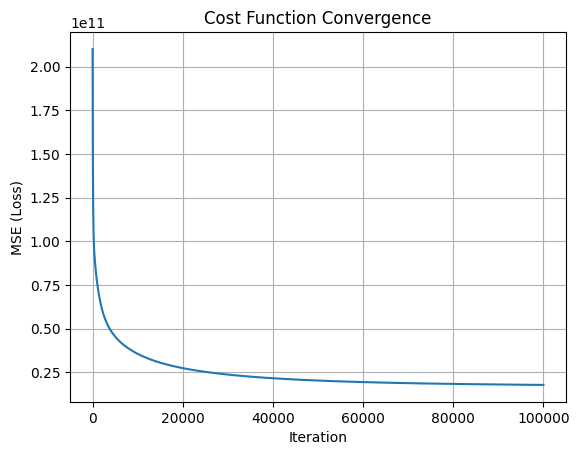

In [47]:
plt.plot(costs)
plt.title("Cost Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("MSE (Loss)")
plt.grid(True)
plt.show()


***Residual Plot (Error vs Prediction)***

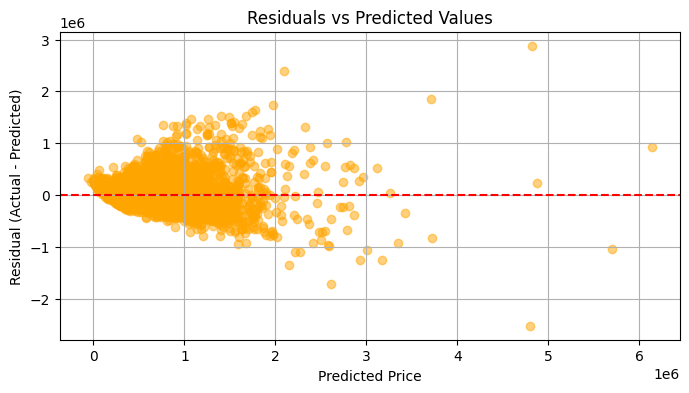

In [48]:
residuals = y_train - y_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()


***Histogram of Prediction Errors***

This plot shows the **distribution of errors** (i.e., `y_pred - y_true`).

**🔍 What it tells:**

🔹  **Centered around 0** → Good sign; model predictions are generally accurate.

🔹 **Symmetric and narrow** → Model makes consistent and low errors.

🔹 **Outliers** (extreme bars far from 0) → Could signal occasional poor predictions.

**✅ Ideal Shape:**

A **bell-like curve** centered at 0 indicates a well-performing model with minimal bias and variance.


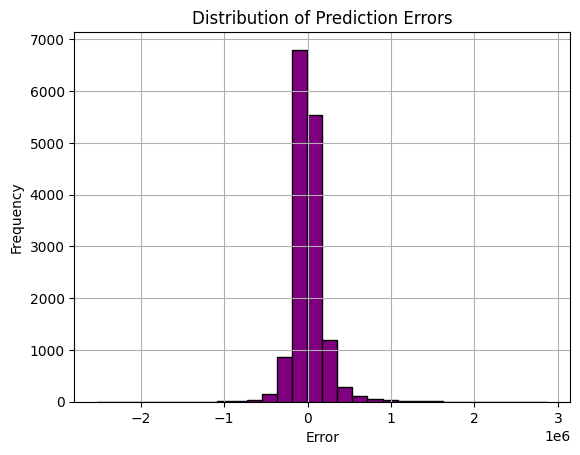

In [49]:
plt.hist(residuals, bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# **Model Deployment**

## 🧪 Test Agent for House Price Predictions

This test agent dynamically evaluates the house price prediction model using the test set.

### 🔍 How It Works:
- Selects a subset of houses from the test set (`X_test`, `y_test`).
- Predicts prices using the trained model weights (`w_opt`).
- Compares predicted prices to actual prices.
- Computes performance metrics (MSE, R-squared) for the subset and the entire test set.

### 📋 Steps:
1. **Sample Selection** 🏁: Randomly selects a few houses from the test set.
2. **Prediction** 🔮: Uses the trained model to predict prices.
3. **Comparison** 📊: Displays actual vs. predicted prices and their differences.
4. **Metrics** 📈: Calculates MSE and R-squared to assess model performance.

### 🌟 Key Outputs:
- **Predicted Prices** 🏠: Shows actual and predicted prices for selected houses.
- **Performance Metrics** 📊: MSE and R-squared for both the subset and the entire test set.

### 📌 Notes:
- Random sampling ensures dynamic testing across different houses each time you run the agent.
- Metrics on the entire test set provide a comprehensive evaluation of model generalization.

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def test_agent(scaler, poly, w_opt, X_test, y_test, num_samples=5):
    """
    Dynamically tests the house price prediction model using the test set.

    Parameters:
        scaler: Trained StandardScaler object
        poly: Trained PolynomialFeatures object
        w_opt: Trained weights (66 elements)
        X_test: Test features (shape: [n_samples, 10])
        y_test: Actual test prices (shape: [n_samples,])
        num_samples: Number of test samples to display
    """
    # Ensure num_samples doesn't exceed the test set size
    num_samples = min(num_samples, len(X_test))

    # Randomly select indices for the subset
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    # Get the subset of test data
    X_subset = X_test[indices]  # Shape: (num_samples, 10)
    y_subset_actual = y_test[indices]  # Shape: (num_samples,)

    # Scale and transform the subset
    X_subset_scaled = scaler.transform(X_subset)  # Shape: (num_samples, 10)
    X_subset_poly = poly.transform(X_subset_scaled)  # Shape: (num_samples, 65)
    X_subset_with_bias = np.hstack((np.ones((num_samples, 1)), X_subset_poly))  # Shape: (num_samples, 66)

    # Predict prices for the subset
    y_subset_pred = X_subset_with_bias @ w_opt  # Shape: (num_samples,)

    # Ensure predicted prices are non-negative
    y_subset_pred = np.maximum(y_subset_pred, 0)

    # Display predictions vs actual prices
    print("\n🏠 Test Agent Results for Selected Houses:")
    print("---------------------------------------------")
    feature_names = ['bedrooms', 'floors', 'waterfront', 'view', 'lat',
                     'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15']

    for i in range(num_samples):
        print(f"\nHouse {i+1}:")
        print("Features:")
        for j, feature in enumerate(feature_names):
            print(f"  {feature}: {X_subset[i, j]:.2f}")
        print(f"Actual Price: ${y_subset_actual[i]:,.2f}")
        print(f"Predicted Price: ${y_subset_pred[i]:,.2f}")
        print(f"Difference: ${y_subset_pred[i] - y_subset_actual[i]:,.2f}")

    # Compute metrics for the subset
    mse_subset = mean_squared_error(y_subset_actual, y_subset_pred)
    r2_subset = r2_score(y_subset_actual, y_subset_pred)

    print("\n📊 Performance Metrics for Subset:")
    print(f"MSE: {mse_subset:,.2f}")
    print(f"R-squared: {r2_subset:.4f}")

    # Compute metrics for the entire test set
    X_test_scaled = scaler.transform(X_test)
    X_test_poly = poly.transform(X_test_scaled)
    X_test_with_bias = np.hstack((np.ones((len(X_test), 1)), X_test_poly))
    y_test_pred = X_test_with_bias @ w_opt
    y_test_pred = np.maximum(y_test_pred, 0)

    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("\n📊 Performance Metrics for Entire Test Set:")
    print(f"MSE: {mse_test:,.2f}")
    print(f"R-squared: {r2_test:.4f}")

# Run the test agent
print("Starting the Test Agent...")
test_agent(scaler, poly, w_opt, X_test, y_test, num_samples=5)

Starting the Test Agent...

🏠 Test Agent Results for Selected Houses:
---------------------------------------------

House 1:
Features:
  bedrooms: 3.00
  floors: 1.50
  waterfront: 0.00
  view: 3.00
  lat: 47.58
  sqft_living: 2660.00
  bathrooms: 2.00
  grade: 8.00
  sqft_above: 1940.00
  sqft_living15: 2270.00
Actual Price: $727,500.00
Predicted Price: $695,144.04
Difference: $-32,355.96

House 2:
Features:
  bedrooms: 4.00
  floors: 2.00
  waterfront: 0.00
  view: 0.00
  lat: 47.55
  sqft_living: 3500.00
  bathrooms: 3.00
  grade: 10.00
  sqft_above: 2360.00
  sqft_living15: 3140.00
Actual Price: $895,000.00
Predicted Price: $932,665.25
Difference: $37,665.25

House 3:
Features:
  bedrooms: 4.00
  floors: 1.50
  waterfront: 0.00
  view: 0.00
  lat: 47.76
  sqft_living: 1460.00
  bathrooms: 1.00
  grade: 7.00
  sqft_above: 1460.00
  sqft_living15: 1690.00
Actual Price: $320,000.00
Predicted Price: $464,607.53
Difference: $144,607.53

House 4:
Features:
  bedrooms: 3.00
  floors: 1.0

# **Factors that Significantly impact model's performance and accuracy**

# 🚀 Improving Model Performance & Accuracy

Below factors are key findings of my learning from assignment.

---

## ⚙️ 1. Use of Stochastic Gradient Descent (SGD)

Unlike **Batch Gradient Descent (BGD)** which uses the entire dataset to compute gradients, **Stochastic Gradient Descent (SGD)** updates weights using **one training example at a time**. This can lead to:

- Faster convergence (especially on large datasets)
- Better generalization
- Escape from local minima due to randomness

## ⚙️ 2. Feature Scaling
Different features with varying magnitudes can negatively affect the gradient update process.

✅ Always apply Standardization (zero mean, unit variance) or Normalization (scaling to [0,1]) to improve training speed and convergence.

## 🧠 3. Feature Engineering
More meaningful and relevant features often lead to better model performance.

Combine existing features to form new ones (polynomial, interaction terms)

Remove irrelevant/noisy features

Use domain knowledge to extract key insights

## 📊 4. Cross-Validation
Split your data into multiple folds to evaluate the model's performance more reliably. This helps in:

Reducing bias in evaluation

Better hyperparameter tuning

Detecting data leakage or overfitting early